### **1. Importing dataset and libraries** ###

In [1]:
# from google.colab import drive
# drive.mount ('/content/drive')

In [2]:
import pandas as pd
# path = "/content/drive/MyDrive/Drug Test - Deep Learning/drug-train new 2-8.xlsx"
path = "drug-train new 2-8.xlsx"
df_train = pd.read_excel(path)
df_train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",3,2015-03-14,32
1,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",3,2017-03-09,54
2,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",3,2014-11-09,18
3,119705,Nilotinib,Chronic Myelogenous Leukemia,"""I have been on Tasigna for just over 3 years ...",3,2015-09-01,11
4,231466,Trazodone,Insomnia,"""I have insomnia, it&#039;s horrible. My story...",3,2016-04-03,43
5,41928,Etanercept,Rheumatoid Arthritis,"""I live in Western Australia and disturbed by ...",3,2017-09-16,4
6,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. ...",3,2014-05-11,99
7,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",3,2017-01-12,11
8,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,3,2010-08-18,1
9,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",3,2013-02-11,16


In [3]:
# path = "/content/drive/MyDrive/Drug Test - Deep Learning/drug-test new 2-8.xlsx"
path = "drug-test new 2-8.xlsx"
df_test = pd.read_excel(path)
df_test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",3,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",3,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",3,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",3,2015-10-22,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",2,2014-07-03,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",2,2016-06-06,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",3,2009-04-21,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",2,2016-10-18,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",1,2011-04-16,3


In [4]:
# Preprocessing packages
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **2. Understanding the data** ###

#### **2.1. Training data** ####

In [5]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",3,2015-03-14,32
1,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",3,2017-03-09,54
2,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",3,2014-11-09,18
3,119705,Nilotinib,Chronic Myelogenous Leukemia,"""I have been on Tasigna for just over 3 years ...",3,2015-09-01,11
4,231466,Trazodone,Insomnia,"""I have insomnia, it&#039;s horrible. My story...",3,2016-04-03,43


In [6]:
df_train = df_train[['review','rating']]
df_train.head(1)

,review,rating
0,"""Abilify changed my life. There is hope. I was...",3


In [7]:
df_train.describe()

,rating
count,161297.000000
mean,2.386535
std,0.819691
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [8]:
df_train['rating'].unique()

array([3, 2, 1], dtype=int64)

In [9]:
print(df_train[df_train['rating'] == 3].count())
print(df_train[df_train['rating'] == 2].count())
print(df_train[df_train['rating'] == 1].count())

review    97410
rating    97410
dtype: int64
review    28824
rating    28824
dtype: int64
review    35063
rating    35063
dtype: int64


([<matplotlib.axis.XTick at 0x1883326ceb0>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

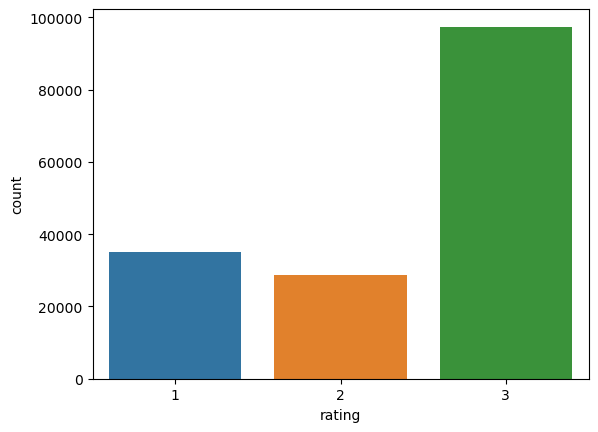

In [10]:
sns.countplot(data=df_train,x='rating')
plt.xticks(ticks=[0,1,2],labels=['1','2','3'])

*NOTE: The data is highly imbalanced. We need to convert the texts into vectors and balance it accordingly.*

In [11]:
type(df_train)

pandas.core.frame.DataFrame

In [12]:
is_two = df_train['rating'] == 2
df_two = df_train[is_two]
df_two

,review,rating
97410,"""Was prescribed one dose over the course of on...",2
97411,"""I battled a nasty UTI for over a month &amp; ...",2
97412,"""66 YO caucasian, male. Developed MS @22-23, d...",2
97413,"""I have been on pills for years, and in 2012 I...",2
97414,"""I just started this medication on April 1st a...",2
...,...,...
126229,"""I have been on this pill for a little over on...",2
126230,"""I&#039;ve been on these pills for 3 weeks now...",2
126231,"""Period wasn&#039;t as heavy as per usual but ...",2
126232,"""I read all the great comments here and talked...",2


In [13]:
is_one = df_train['rating'] == 1
df_one = df_train[is_one]
df_one

,review,rating
126234,"""Started Nexplanon 2 months ago because I have...",1
126235,"""I was put on Yasmin for 6 months to regulate ...",1
126236,"""This medicine is absolutely terrible. After t...",1
126237,"""I&#039;m 16 and I have been on Loestrin 24 f...",1
126238,"""I was put on this birth control when I was 15...",1
...,...,...
161292,"""POISON....two days on this med &amp; I though...",1
161293,"""Had taken Armour Thyroid for 20 years but sta...",1
161294,"""Used this a month ago for allergic conjunctiv...",1
161295,"""Up to 800mg seems to work about once every 2n...",1


In [14]:
df_train.count()

review    161297
rating    161297
dtype: int64

In [15]:
df_train = df_train.append([df_two] * 3, ignore_index=True)
df_train = df_train.append([df_one] * 2, ignore_index=True)

C:\Users\tarpa\AppData\Local\Temp\ipykernel_1972\2909103487.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append([df_two] * 3, ignore_index=True)
C:\Users\tarpa\AppData\Local\Temp\ipykernel_1972\2909103487.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append([df_one] * 2, ignore_index=True)


In [16]:
df_train.count()

review    317895
rating    317895
dtype: int64

([<matplotlib.axis.XTick at 0x18833ef5ac0>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

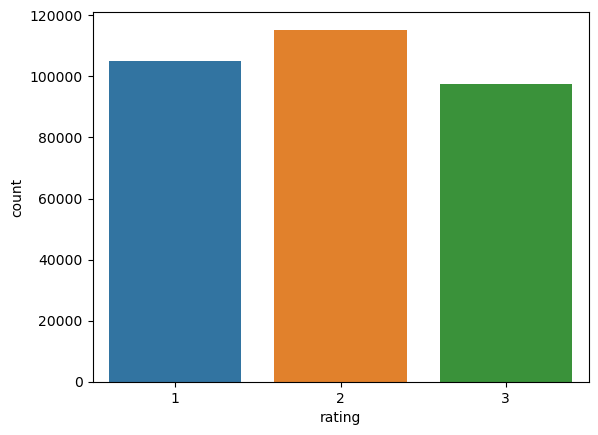

In [17]:
sns.countplot(data=df_train,x='rating')
plt.xticks(ticks=[0,1,2],labels=['1','2','3'])

In [18]:
df_train.describe()

,rating
count,317895.000000
mean,1.975530
std,0.797946
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [19]:
X_train = df_train[['review']]
Y_train = df_train[['rating']]

In [20]:
X_train.describe()

,review
count,317895
unique,112329
top,"""Good"""
freq,51


#### **2.2. Testing data** ####

In [21]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",3,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",3,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",3,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",3,2015-10-22,4


In [22]:
df_test = df_test[['review','rating']]
df_test.head(1)

,review,rating
0,"""I&#039;ve tried a few antidepressants over th...",3


In [23]:
df_test.describe()

,rating
count,53766.000000
mean,2.381486
std,0.822387
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [24]:
df_test['rating'].unique()

array([3, 2, 1], dtype=int64)

In [25]:
print(df_test[df_test['rating'] == 3].count())
print(df_test[df_test['rating'] == 2].count())
print(df_test[df_test['rating'] == 1].count())

review    32349
rating    32349
dtype: int64
review    9579
rating    9579
dtype: int64
review    11838
rating    11838
dtype: int64


([<matplotlib.axis.XTick at 0x18833f62880>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

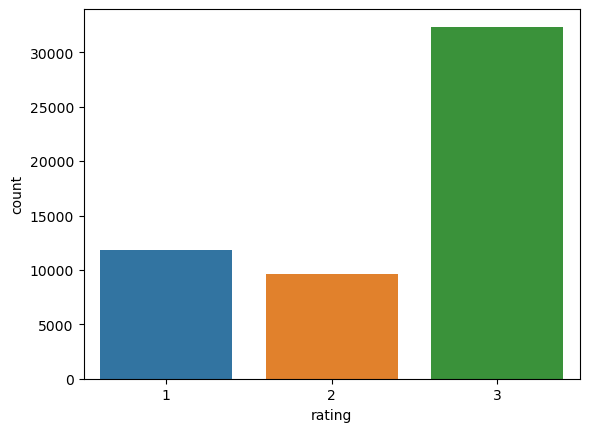

In [26]:
sns.countplot(data=df_test,x='rating')
plt.xticks(ticks=[0,1,2],labels=['1','2','3'])

In [27]:
X_test = df_test[['review']]
Y_test = df_test[['rating']]

*NOTE: The data is highly imbalanced. We need to convert the texts into vectors and balance it accordingly.*

### **3. Text Preprocessing** ###

In [28]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
def clean_text(text):
    """
    Data Preprocessing is done here.
    """

    # Step 1 -  Lowering the cases
    text = text.lower()

    # Step 2 - remove urls and '
    text = re.sub(r"http\S+|www\S+|https\S+", "URL",text,flags = re.MULTILINE)
    text = re.sub(r"039", "",text,flags = re.MULTILINE)

    # Step 3 - remove punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Step 4 - remove @ and #
    text = re.sub(r'\@',"USER",text)
    text = re.sub(r'\#', "", text)

    # Step 5 - remove extra charaters in each word (more than 2 continuous ones)
    repeat_char = re.compile(r"(.)\1{1,}", re.IGNORECASE)
    text = repeat_char.sub(r"\1\1", text)
    text = re.sub("(.)\\1{2,}", "\\1", text)

    # Step 6 - remove tokens
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords]

    # Step 7 - Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in tokens]
        
    return " ".join(lemma_words)

df_train['review'] = [clean_text(text) for text in df_train['review']]
df_test['review'] = [clean_text(text) for text in df_test['review']]

In [30]:
df_train.head()

,review,rating
0,abilify changed life hope zoloft clonidine fir...,3
1,taken antidepressants years improvement mostly...,3
2,ive every medicine sun seems manage hypomania ...,3
3,tasigna 3 years 300mg x 2 times day tasigna wo...,3
4,insomnia horrible story begins pcp prescribing...,3


In [31]:
df_train.tail(10)

,review,rating
317885,given spasms upper spine cervical region anaph...,1
317886,covered family pact california insertion painf...,1
317887,bystolic feet arms numb blood sugars became se...,1
317888,livalo two months change cholesterol levels st...,1
317889,switched portia 12 days ago started spotting a...,1
317890,poisontwo days med amp thought going die total...,1
317891,taken armour thyroid 20 years starting 2 years...,1
317892,used month ago allergic conjunctivitis thought...,1
317893,800mg seems work every 2nd day still excruciat...,1
317894,given iv surgey immediately became anxious cou...,1


In [32]:
df_test.tail(10)

,review,rating
53756,treatment adhd save life dont believe hype sti...,3
53757,3rd time taking medicine first 2 times shin bo...,3
53758,medicine kept sleeping whole 5 days body start...,1
53759,microgestin 3 years past year started get extr...,2
53760,started taking apri 7 months ago breats got no...,3
53761,taken tamoxifen 5 years side effects severe sw...,3
53762,ive taking lexapro escitaploprgram since febru...,3
53763,im married 34 years old kids taking pill hassl...,3
53764,prescribed nucynta severe neckshoulder pain ta...,1
53765,works,3


In [33]:
# online (Google Colab)
# df_train.to_csv('/content/drive/MyDrive/Drug Test - Deep Learning/train_text_preprocessed.csv')
# df_test.to_csv('/content/drive/MyDrive/Drug Test - Deep Learning/test_text_preprocessed.csv')

# offline
df_train.to_csv('train_text_preprocessed.csv')
df_test.to_csv('test_text_preprocessed.csv')

### **4. --Checkpoint--** ###

In [34]:
# from google.colab import drive
# drive.mount ('/content/drive')

In [35]:
import pandas as pd
# df_train = pd.read_csv("/content/drive/MyDrive/Drug Test - Deep Learning/train_text_preprocessed.csv")
# df_test = pd.read_csv("/content/drive/MyDrive/Drug Test - Deep Learning/test_text_preprocessed.csv")

df_train = pd.read_csv("train_text_preprocessed.csv")
df_test = pd.read_csv("test_text_preprocessed.csv")

In [36]:
# Model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [37]:
df_train.dropna(inplace=True)
df_train.head()

,Unnamed: 0,review,rating
0,0,abilify changed life hope zoloft clonidine fir...,3
1,1,taken antidepressants years improvement mostly...,3
2,2,ive every medicine sun seems manage hypomania ...,3
3,3,tasigna 3 years 300mg x 2 times day tasigna wo...,3
4,4,insomnia horrible story begins pcp prescribing...,3


In [38]:
df_test.dropna(inplace=True)
df_test.head()

,Unnamed: 0,review,rating
0,0,ive tried antidepressants years citalopram flu...,3
1,1,son crohns disease done well asacol complaints...,3
2,2,quick reduction symptoms,3
3,3,contrave combines drugs used alcohol smoking o...,3
4,4,birth control one cycle reading reviews type s...,3


In [39]:
print("df_train counts: ", df_train.count())
print("df_test counts: ", df_test.count())

df_train counts:  Unnamed: 0    317889
review        317889
rating        317889
dtype: int64
df_test counts:  Unnamed: 0    53766
review        53766
rating        53766
dtype: int64


In [40]:
df_train['rating'].value_counts()

2    115296
1    105189
3     97404
Name: rating, dtype: int64

In [41]:
df_train = df_train[['review','rating']]
df_train.head(3)

,review,rating
0,abilify changed life hope zoloft clonidine fir...,3
1,taken antidepressants years improvement mostly...,3
2,ive every medicine sun seems manage hypomania ...,3


In [42]:
df_test = df_test[['review','rating']]
df_test.head(3)

,review,rating
0,ive tried antidepressants years citalopram flu...,3
1,son crohns disease done well asacol complaints...,3
2,quick reduction symptoms,3


In [43]:
df_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
317890     True
317891     True
317892     True
317893     True
317894     True
Length: 317889, dtype: bool

In [44]:
x_temp = df_train['review']
y_temp = df_train['rating']

In [45]:
x_temp1 = df_test['review']
y_temp1 = df_test['rating']

x_temp - train data texts<br>
y_temp - train data values
<br><br>
x_temp1 - test data texts<br>
y_temp1 - test data values

In [46]:
x_temp

0         abilify changed life hope zoloft clonidine fir...
1         taken antidepressants years improvement mostly...
2         ive every medicine sun seems manage hypomania ...
3         tasigna 3 years 300mg x 2 times day tasigna wo...
4         insomnia horrible story begins pcp prescribing...
                                ...                        
317890    poisontwo days med amp thought going die total...
317891    taken armour thyroid 20 years starting 2 years...
317892    used month ago allergic conjunctivitis thought...
317893    800mg seems work every 2nd day still excruciat...
317894    given iv surgey immediately became anxious cou...
Name: review, Length: 317889, dtype: object

In [47]:
y_temp

0         3
1         3
2         3
3         3
4         3
         ..
317890    1
317891    1
317892    1
317893    1
317894    1
Name: rating, Length: 317889, dtype: int64

In [48]:
x_temp1

0        ive tried antidepressants years citalopram flu...
1        son crohns disease done well asacol complaints...
2                                 quick reduction symptoms
3        contrave combines drugs used alcohol smoking o...
4        birth control one cycle reading reviews type s...
                               ...                        
53761    taken tamoxifen 5 years side effects severe sw...
53762    ive taking lexapro escitaploprgram since febru...
53763    im married 34 years old kids taking pill hassl...
53764    prescribed nucynta severe neckshoulder pain ta...
53765                                                works
Name: review, Length: 53766, dtype: object

In [49]:
y_temp1

0        3
1        3
2        3
3        3
4        3
        ..
53761    3
53762    3
53763    3
53764    1
53765    3
Name: rating, Length: 53766, dtype: int64

### **5. Texts to numbers** ###

#### **5.1 Converting y_temp to y_train and y_temp1 to y_test**####

In [50]:
y_temp = np.asarray(y_temp)

y_temp1 = np.asarray(y_temp1)

In [51]:
import numpy as np
y_temp = np.where(y_temp==3,0,y_temp)
y_temp = np.asarray(y_temp)
y_temp #After changing values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
y_temp1 = np.where(y_temp1==3,0,y_temp1)
y_temp1 = np.asarray(y_temp1)
y_temp1 #After changing values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

<strong><h3>So, values 1, 2 and 3 in ratings have been changed to 1, 2 and 0 respectively, for simplicity.<h3></strong>

In [53]:
num_classes = 3
y_train = to_categorical(y_temp, num_classes)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [54]:
y_test = to_categorical(y_temp1, num_classes)
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

#### **6.2 Converting x_temp to x_train and x_temp1 to x_test**####

In [55]:
tk_review = Tokenizer(num_words=200000) #num_words says the number of top frequent words
tk_review.fit_on_texts(x_temp)
sequences_train = tk_review.texts_to_sequences(x_temp)
word_index = tk_review.word_index

In [56]:
V = len(word_index)
V

84317

In [57]:
sequences_train[0]

[852,
 279,
 53,
 218,
 397,
 2309,
 8,
 10,
 852,
 550,
 250,
 397,
 71,
 13840,
 1444,
 780,
 1836,
 854,
 44,
 213,
 2429,
 27,
 156,
 819,
 3066,
 255,
 1836,
 124,
 212,
 80,
 1681,
 852,
 265,
 19,
 11,
 1683,
 157,
 102,
 1,
 537,
 394,
 293,
 3188,
 102,
 852,
 91,
 81,
 13,
 120,
 780,
 44,
 823,
 43,
 23,
 9810,
 661,
 1151,
 194,
 821,
 17,
 93,
 216,
 4,
 129,
 11,
 175,
 106]

In [58]:
#Check input length...should be in same size
max = 0
for i in range(len(sequences_train)):
  word_number = len(sequences_train[i])
  if (word_number) > (max):
    max = word_number
print(max)

963


In [59]:
T=max

In [60]:
x_train = pad_sequences(sequences_train, padding = 'post', maxlen = max)
x_train[0]

array([  852,   279,    53,   218,   397,  2309,     8,    10,   852,
         550,   250,   397,    71, 13840,  1444,   780,  1836,   854,
          44,   213,  2429,    27,   156,   819,  3066,   255,  1836,
         124,   212,    80,  1681,   852,   265,    19,    11,  1683,
         157,   102,     1,   537,   394,   293,  3188,   102,   852,
          91,    81,    13,   120,   780,    44,   823,    43,    23,
        9810,   661,  1151,   194,   821,    17,    93,   216,     4,
         129,    11,   175,   106,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [61]:
sequences_test = tk_review.texts_to_sequences(x_temp1)
word_index = tk_review.word_index

In [62]:
x_test = pad_sequences(sequences_test, padding = 'post', maxlen = max)
x_test[0]

array([   6,   81,  817,   16, 1634, 2568, 2202,  701,  123,   71,  299,
         96,   45,   34,  634,  279, 1710, 5059, 2340,   49,  792,   53,
       1586,    4,   12,  479, 1105,   33,  108,    6,  238,  120, 1314,
         33,   36,  593,  358, 2340,  792,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [63]:
x_train.shape

(317889, 963)

In [64]:
y_train.shape

(317889, 3)

In [65]:
x_test.shape

(53766, 963)

In [66]:
y_test.shape

(53766, 3)

### **6. Preparing the model** ###

In [67]:
from keras.layers.pooling import GlobalMaxPooling1D
#Creating model

D = 20 # Dimension of Embedding layer
M = 15 # Dimension of LSTM layer

model = Sequential()
model.add(Embedding(V+1, D, input_length = x_train.shape[1]))
model.add(LSTM(M, return_sequences=True, recurrent_dropout=0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 963, 20)           1686360   
                                                                 
 lstm (LSTM)                 (None, 963, 15)           2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,689,131
Trainable params: 1,689,131
Non-trainable params: 0
______________________________________________

In [69]:
# tf.keras.utils.plot_model(model, show_shapes = True)

In [70]:
y_test.shape

(53766, 3)

In [71]:
# training model
history = model.fit(x_train,y_train, epochs=5, verbose=1, validation_data = (x_test,y_test))

Epoch 1/5
9935/9935 [==============================] - 8382s 843ms/step - loss: 0.4067 - accuracy: 0.7124 - val_loss: 0.4063 - val_accuracy: 0.7270
Epoch 2/5
9935/9935 [==============================] - 8571s 863ms/step - loss: 0.2675 - accuracy: 0.8291 - val_loss: 0.3946 - val_accuracy: 0.7478
Epoch 3/5
9935/9935 [==============================] - 8480s 854ms/step - loss: 0.2182 - accuracy: 0.8632 - val_loss: 0.3772 - val_accuracy: 0.7680
Epoch 4/5
9935/9935 [==============================] - 8348s 840ms/step - loss: 0.1958 - accuracy: 0.8788 - val_loss: 0.3882 - val_accuracy: 0.7767
Epoch 5/5
9935/9935 [==============================] - 8410s 847ms/step - loss: 0.1831 - accuracy: 0.8866 - val_loss: 0.3964 - val_accuracy: 0.7776


In [72]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


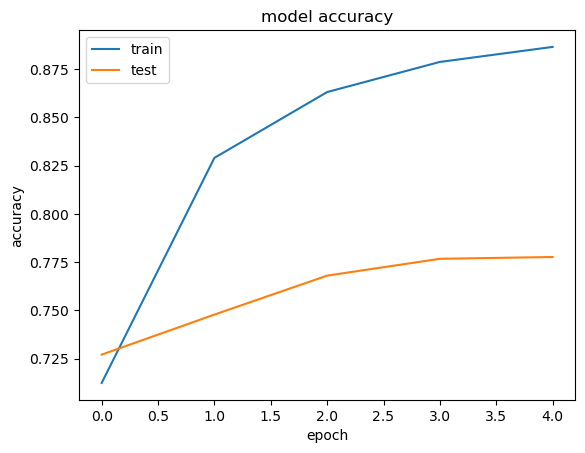

In [73]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

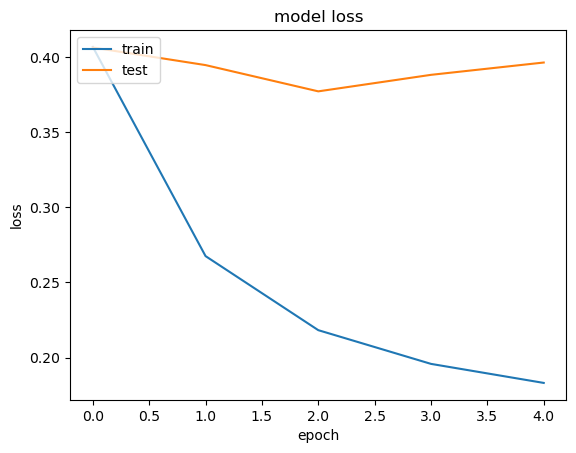

In [74]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **7. Predicting sentences** ###

In [83]:
a = ['i love it very much']
a = tk_review.texts_to_sequences(a)
a = np.array(a)
a = pad_sequences(a,padding='post',maxlen=max)
print(a.shape)
prediction = model.predict(np.array(a))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

if prediction[0][0].round() == 1:
    print(3)
elif prediction[0][1].round() == 1:
    print(1)
elif prediction[0][2].round() == 1:
    print(2)

(1, 963)
1/1 [==============================] - 0s 135ms/step
1.0 0.0 0.0
3


In [89]:
b = ['it is terrible']
b = tk_review.texts_to_sequences(b)
b = np.array(b)
b = pad_sequences(b,padding='post',maxlen=max)
print(b.shape)
prediction = model.predict(np.array(b))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

print(prediction[0][0], prediction[0][1], prediction[0][2])

if prediction[0][0].round() == 1:
    print(3)
elif prediction[0][1].round() == 1:
    print(1)
elif prediction[0][2].round() == 1:
    print(2)

(1, 963)
1/1 [==============================] - 0s 163ms/step
0.0 1.0 0.0
0.028523419 0.9582282 0.012090694
1


In [84]:
c = ['i ate it with great pleasure']
c = tk_review.texts_to_sequences(c)
c = np.array(c)
c = pad_sequences(c,padding='post',maxlen=max)
print(c.shape)
prediction = model.predict(np.array(c))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

if prediction[0][0].round() == 1:
    print(3)
elif prediction[0][1].round() == 1:
    print(1)
elif prediction[0][2].round() == 1:
    print(2)

(1, 963)
1/1 [==============================] - 0s 143ms/step
1.0 0.0 0.0
3


In [90]:
d = ['i dislike how bad the sofa feels']
d = tk_review.texts_to_sequences(d)
d = np.array(d)
d = pad_sequences(d,padding='post',maxlen=max)
print(d.shape)
prediction = model.predict(np.array(d))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

if prediction[0][0].round() == 1:
    print(3)
elif prediction[0][1].round() == 1:
    print(1)
elif prediction[0][2].round() == 1:
    print(2)

(1, 963)
1/1 [==============================] - 0s 122ms/step
0.0 1.0 0.0
1


### **7. Exporting model** ###

In [79]:
model.save('Sentiment_analysis_Drug_test.h5')

### **8. Model Indormation** ###

In [80]:
# x_test_dummy = tk_review.texts_to_sequences(x_test)
# x_test_dummy = np.array(x_test_dummy)
# x_test_dummy = pad_sequences(x_test_dummy,padding='post',maxlen=max)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Predict probabilities for test set
# yhat_probs = model.predict(x_test_dummy, verbose=0)
yhat_probs = model.predict(x_test, verbose=0)
yhat_probs

yhat_classes = yhat_probs.round().astype(int)
yhat_classes

yhat_test = y_test

# Reduce to 1d array
yhat_test = yhat_test[:, 0]
yhat_classes = yhat_classes[:, 0]

# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yhat_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# Precision tp / (tp + fp)
precision = precision_score(yhat_test, yhat_classes)
print('Precision: %f' % precision)

# Recall: tp / (tp + fn)
recall = recall_score(yhat_test, yhat_classes)
print('Recall: %f' % recall)

# F1 Score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yhat_test, yhat_classes)
print('F1 score: %f' % f1)

# Confusion matrix
matrix = confusion_matrix(yhat_test, yhat_classes)
print(matrix)

Accuracy: 0.829446
Precision: 0.905213
Recall: 0.800334
F1 score: 0.849549
[[18706  2711]
 [ 6459 25890]]
